In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
file = "Locality_village_pincode_final_mar-2017.csv"
df = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 151040: invalid start byte

In [44]:
df.head()

,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,3:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,Not Available,330059711001024,6:30 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,Not Available,330059713003015,5:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,Not Available,330059714011009,5:00 Pm [M-F]\r\nno Sat Pickup,DHL Authorized Shipping Center,DHL Authorized Shipping Center
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,Not Available,330199759022015,3:00 Pm [M-F]\r\n12:00 Pm [Sat],DHL Authorized Shipping Center,DHL Authorized Shipping Center


In [45]:
df.dtypes

X               float64
Y               float64
OBJECTID          int64
FEATURE_ID        int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
LATITUDE        float64
LONGITUDE       float64
MATCH_STATUS     object
PLACEMENT        object
CENSUS_CODE      object
LAST_PICKUP      object
LOCATION_TY      object
LOCATION_TH      object
dtype: object

In [46]:
#To get statistical summary of the dataframe
df.describe()

,X,Y,OBJECTID,FEATURE_ID,ZIP,LATITUDE,LONGITUDE
count,2.407200e+04,2.407200e+04,24072.000000,24072.000000,24072.000000,24072.000000,24072.000000
mean,-1.001516e+07,4.504405e+06,12036.500000,12036.816426,48782.274634,37.295641,-89.967749
std,1.644021e+06,7.143163e+05,6949.132176,6949.506833,28163.535248,5.128487,14.768493
min,-1.773961e+07,2.230536e+06,1.000000,1.000000,1001.000000,19.640879,-159.357662
25%,-1.075899e+07,3.990164e+06,6018.750000,6018.750000,28034.750000,33.711759,-96.649631
50%,-9.496394e+06,4.690440e+06,12036.500000,12036.500000,45219.000000,38.781629,-85.307562
75%,-8.915677e+06,5.031130e+06,18054.250000,18055.250000,75234.000000,41.127257,-80.090890
max,-7.551491e+06,9.569101e+06,24072.000000,24073.000000,99801.000000,64.850494,-67.836195


In [47]:
#Top 10 City-wise number of pickups made
city_object=df.groupby('CITY').nunique()['LAST_PICKUP']
city_object.sort_values(ascending=False)[:10].plot.bar()

<Axes: xlabel='CITY'>

In [48]:
#Top 10 City-wise No of Objects serviced?
city_object=df.groupby('CITY').nunique()['OBJECTID']
city_object.sort_values(ascending=False)[:10].plot.barh(color='maroon')

<Axes: ylabel='CITY'>

In [49]:
#State-wise No of Cities, where DHFL Services are provided? 
state_city = df.groupby('STATE').nunique()['CITY']
state_city.sort_values(ascending=False).plot.bar(figsize=(25,15))

<Axes: xlabel='STATE', ylabel='CITY'>

In [50]:
#Total Number of Objects IDs Serviced by DHFL
df.nunique()['OBJECTID']

24072

In [51]:
#Zip Code wise Number of Objects Serviced
df.groupby('ZIP').nunique()['OBJECTID'].sort_values(ascending=False).head(10)

ZIP
43215    44
30339    41
45202    40
30328    33
48034    31
60515    30
78759    30
60173    30
48084    29
28217    29
Name: OBJECTID, dtype: int64

In [52]:
loc=df.groupby('LOCATION_TH')
s1 = len(df[df['LOCATION_TH']=='DHL Staffed Facility'])
s2 = len(df[df['LOCATION_TH']=='DHL Authorized Shipping Center'])
s3 = len(df[df['LOCATION_TH']=='Drop Box and Drop Off Facility'])

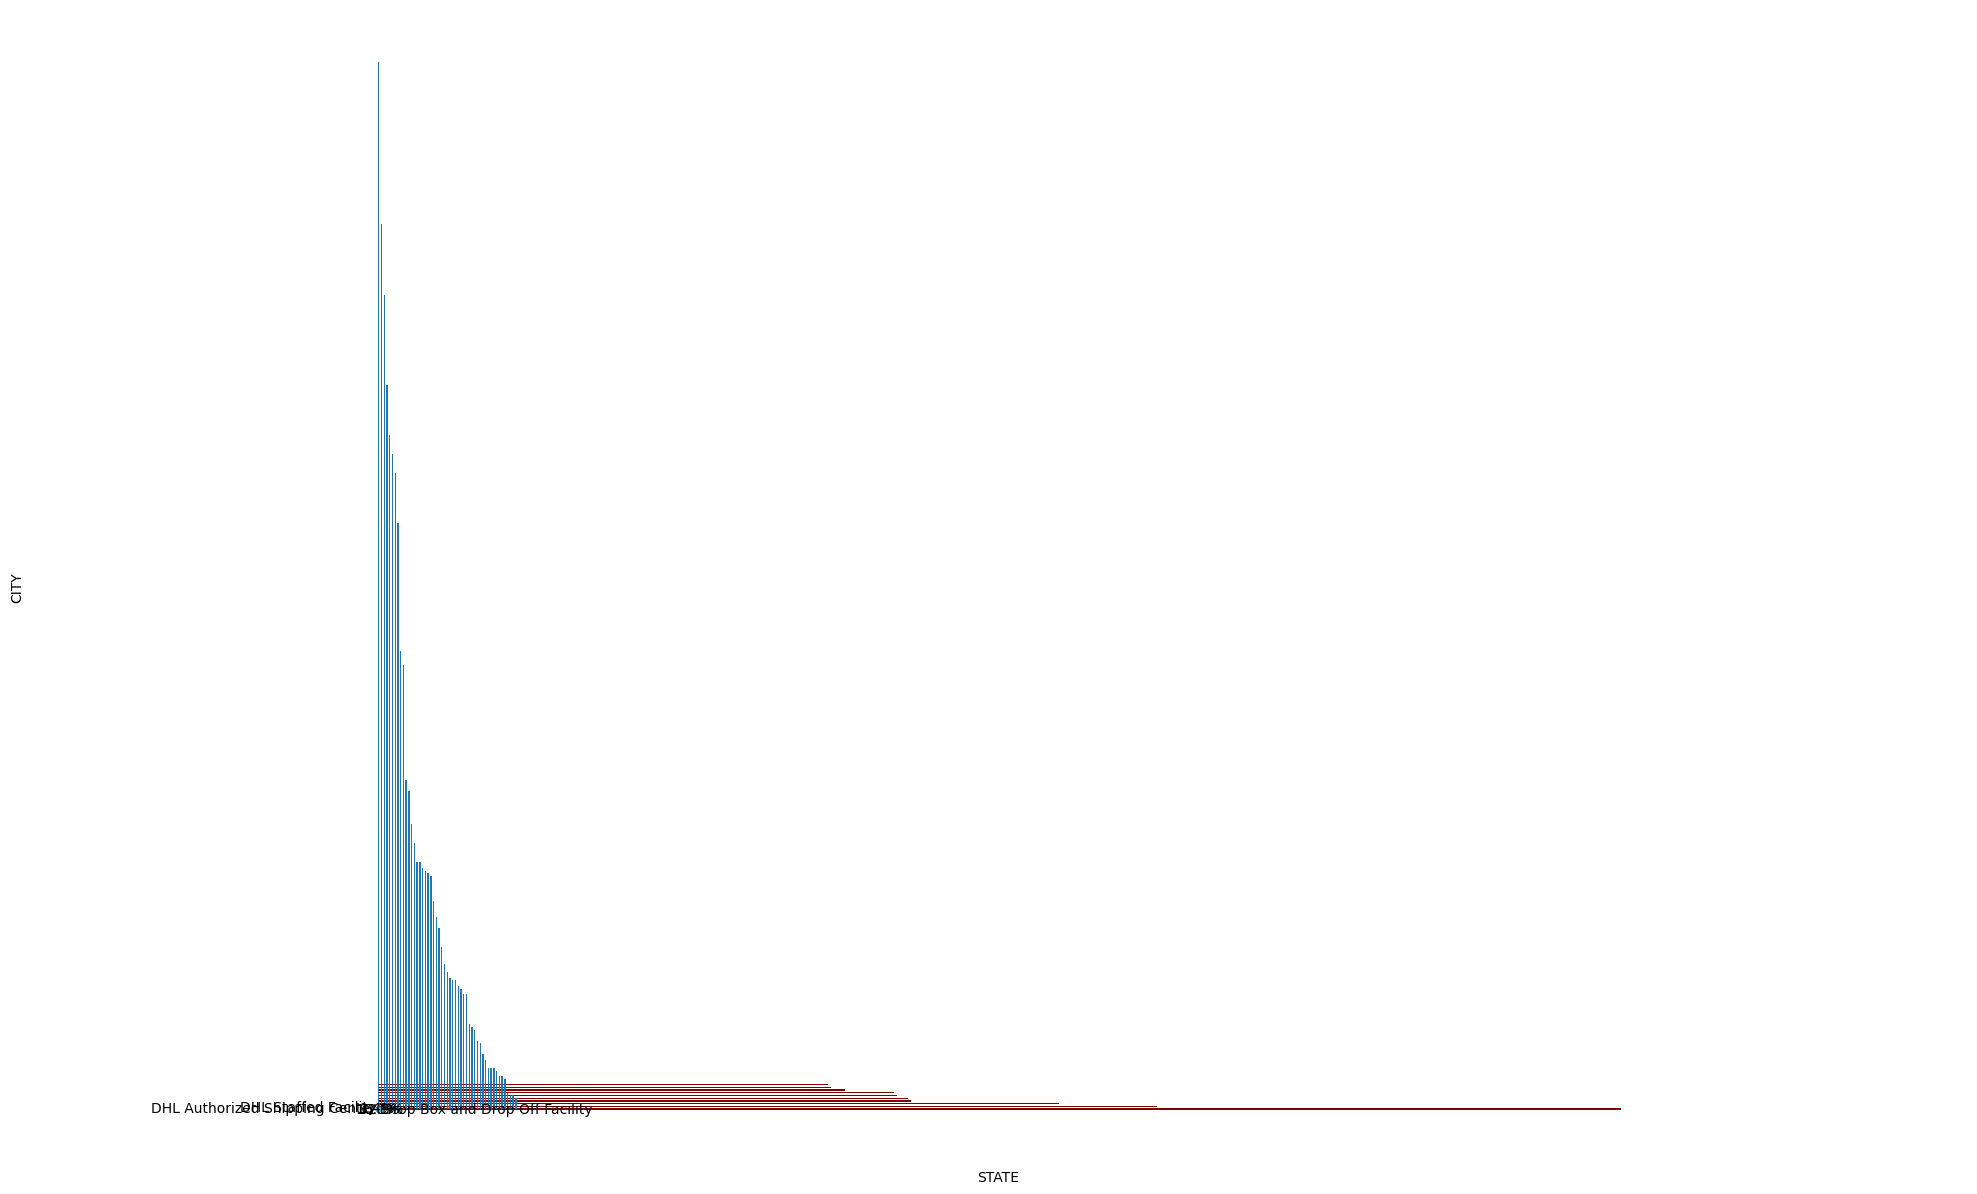

In [53]:
#Location_th filter 
labels = 'DHL Staffed Facility','DHL Authorized Shipping Center','Drop Box and Drop Off Facility'
sizes = [s1,s2,s3]
colors = ['#ff304f','#775ada','#28c7fa']
explode = (0.01,0.01,0.1)
#Plot
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()